# Name = Deepesh Yadav
# project_001 Pridcting house price using LR

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Data preprocessing

In [3]:
#loading data
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#put the data into pandas Dataframe
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
features['NOX']

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 506, dtype: float64

In [6]:
target = pd.DataFrame(boston.target,columns=['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
#min & max target
print(max(target['target']))
print(min(target['target']))

50.0
5.0


In [8]:
# concatinating features and target in a single data frame
# axis=1 concatenated columwise and axis = 0(default)concatenates raw wise

df = pd.concat([features,target],axis = 1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
# description of data set
df.describe().round(decimals = 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


# Step 2: Data visualization

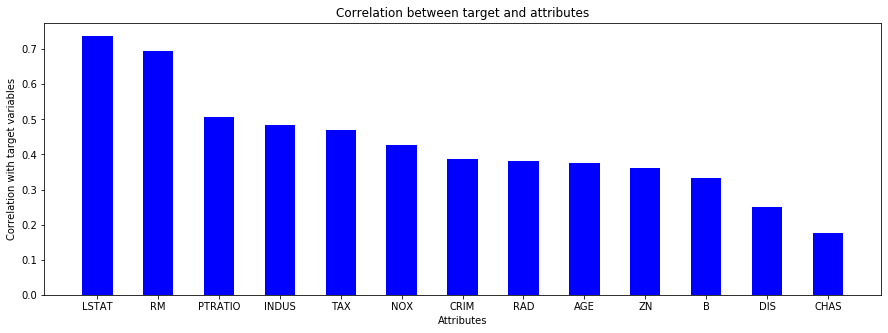

In [10]:
#correlation between every attribute and target
corr = df.corr("pearson")

#obtaining absolute values(positive) of correlation
corrs = [abs(corr[attr]['target']) for attr in list(features)]
# combining corr values and features together
l = list(zip(corrs,list(features)))
# sort of corrilation values in descending order with correlation values as the key
l.sort(key=lambda x: x[0],reverse=True)

corrs,labels = list(zip(*l))

# plot correlation graph
index = np.arange(len(labels))
plt.figure(figsize = (15,5))
plt.bar(index,corrs,width=0.5, color = 'blue')
plt.xlabel("Attributes")
plt.ylabel("Correlation with target variables")
plt.xticks(index,labels)
plt.title("Correlation between target and attributes")
plt.show()

# Step 3: Normalization of data

In [11]:
X = df['LSTAT'].values
y = df['target'].values

#creating an instance of scaler object then using fit transform
X_scaler = MinMaxScaler()
X = X_scaler.fit_transform(X.reshape(-1,1))
X = X[:,-1]

y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.reshape(-1,1))
y = y[:,-1]

# Step 3: Split the data

## Spliting the data into training and test set

In [12]:
X_train, X_test,y_train,y_test = train_test_split(X,y)

# Mean sqaured error

### 3 functions(Error , update and gradient discent)

In [13]:
def error(m,x,c,t):
    N=x.size
    e = sum(((m*x + c)-t)**2)
    return e * 1/ (2*N)

In [14]:
def update(m,x,c,t,learning_rate):
    grad_m = sum(2*((m*x + c)-t)*x)
    grad_c = sum(2*((m*x + c)-t))
    m = m-grad_m*learning_rate
    c = c-grad_c*learning_rate
    return m,c
    

In [15]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m,x,c,t)
        if e<error_threshold:
            print("error is less then threshold, stopping gradient desc.")
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

# Using gradient descent

In [16]:
%%time
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001
m,c,error_values,mc_values = gradient_descent(init_m,init_c,X_train,y_train,learning_rate,iterations,error_threshold)

Wall time: 120 ms


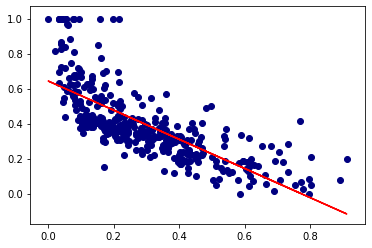

In [34]:
#plot regression curve
plt.scatter(X_train,y_train,color = "navy")
plt.plot(X_train,(m*X_train + c),color='r')

Text(0.5, 0, 'Iteration')

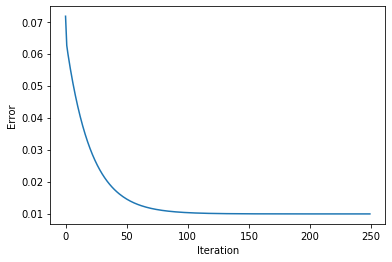

In [18]:
#plot error
plt.plot(np.arange(len(mc_values)),error_values)
plt.ylabel("Error")
plt.xlabel("Iteration")

In [25]:
#get pridicted values
predicted = m*(X_test) + c

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predicted)

0.01751978751685387

In [28]:
p = pd.DataFrame(list(zip(X_test,y_test,predicted)),columns=["x",'target','predicted_y'])
p.head()

,x,target,predicted_y
0,0.103753,0.615556,0.556875
1,0.241998,0.400000,0.441669
2,0.972682,0.044444,-0.167244
3,0.424117,0.308889,0.289901
4,0.133554,0.375556,0.532040


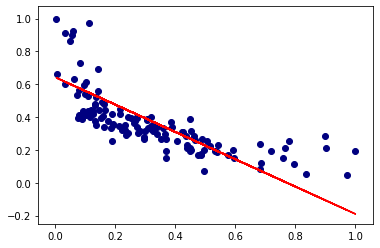

In [30]:
plt.scatter(X_test,y_test,color = 'navy')
plt.plot(X_test,predicted,color='r')

In [33]:
#reshape array and revert normalization
predicted = predicted.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

X_test_scaled = X_scaler.inverse_transform(X_test)
y_test_scaled = y_scaler.inverse_transform(y_test)
predicted_scaled = y_scaler.inverse_transform(predicted)

#get rid of extra dimension by slising
X_test_scaled = X_test_scaled[:,-1]
y_test_scaled = y_test_scaled[:,-1]
predicted_scaled = predicted_scaled[:,-1]

p = pd.DataFrame(list(zip(X_test_scaled,y_test_scaled,predicted_scaled)),columns=["X_test","y_test","scaled"])
p.round(decimals=2)
p.head()

,X_test,y_test,scaled
0,5.49,32.7,30.059376
1,10.50,23.0,24.875109
2,36.98,7.0,-2.525965
3,17.10,18.9,18.045536
4,6.57,21.9,28.941809


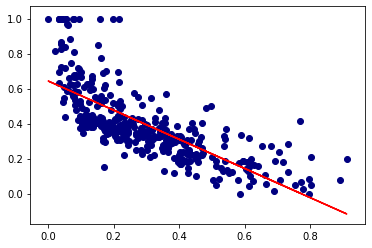

In [35]:
#plot regression curve
plt.scatter(X_train,y_train,color = "navy")
plt.plot(X_train,(m*X_train + c),color='r')